<a href="https://colab.research.google.com/github/jdumez10/Covid_19_Colombia_General_Visualization/blob/main/COVID_19_In_Colombia_General_analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Analysis of COVID-19 in Colombia***

# ***Introduction***

At the end of the year 2019, a new virus began infecting humans, triggering a pandemic. In response to the virus's rapid transmission and the need to save lives, a global quarantine was initiated, and thorough monitoring of COVID-19 cases began.

Governments worldwide began constructing databases to track COVID-19 cases, enabling them to understand the evolution of the pandemic and make informed decisions. Colombia was no exception and developed several databases to gain insight into the situation.

Although COVID-19 appears to be less lethal in children and adolescents, many decisions regarding the pandemic have prioritized adult lives. Nevertheless, to fully understand how the virus affects the pediatric population, this project aims to analyze COVID-19 cases in babies, children, adolescents, and adults in Colombia. Four groups have been established for this purpose:
 
**1.   Babies** (*individuals aged 0-2 years*)

**2.   Childre** (*individuals aged 2-12 years*)

**3.   Adolescents** (*individuals aged 12-18 years*)

**4.   Adults** (*individuals aged 18 years and older*)

Finally, the project aims to explore whether there is any correlation between mortality rates and geographic regions or ethnic groups in each population group analyzed.




With the aim of carrying out this project, the first step will be to perform the corresponding import of the libraries to be used in the project.

In [3]:
!pip install -U plotly
!pip install -U kaleido # We need this library to export visualizations as static images

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
import plotly


import plotly.graph_objects as go
print(f'Plotly: {plotly.__version__}')

In [6]:
import plotly.graph_objs as go 
import plotly.express as px

In [7]:
# We proceed to see the versions with which this project will be carried out

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)


Python 3.10.11
NumPy 1.22.4
Pandas 1.5.3
SciPy 1.10.1
statsmodels 0.13.5
Matplotlib 3.7.1
Seaborn 0.12.2


This data analysis was carried out with the following versions:
*   Python: 3.7.12
*   NumPy: 1.19.5
*   Pandas: 1.1.5
*   SciPy: 1.4.1
*   statsmodels: 0.10.2
*   Matplotlib: 3.2.2
*   Seaborn: 0.11.2
*   Plotly: 4.4.1















# ***Understanding the Data***


The first step in this stage is to carry out the data acquisition of the data to be analyzed, which corresponds to the Daily Report of COVID-19 cases in Colombia. This database is managed by the Ministry of Information and Communication Technologies of Colombia. The website where the generalities of the database are described can be found at https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr Next, the database will be exported and in addition to this, a description of it will be given.

In [8]:
## We obtain the data from the URL

url = 'https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD'

df = pd.read_csv(url)

<ipython-input-8-b2d0baf0d08b>:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [9]:
## With this, we see in a general way how the database is structured.

df.info() # We have a total of 6,365,262 reported cases of Covid in this database.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365262 entries, 0 to 6365261
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    int64  
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  int64  
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     int64  
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

From this information, it can be affirmed that this database is built in the following way:

*   **General information of the case:** This includes the web report date, notification date, and the case ID.
*   **Geographic information** : This includes the respective DIVIPOLA names and codes by department and municipality. 
*   **General information of the individual:** This includes age, the unit of measurement (where 1 is years, 2 is months, and 3 is days), sex, ethnic membership, and the name of the ethnic group (in the case of being indigenous). The ethnic reference column is completed as follows: 

    ○ Completed with the number one (1): Indigenous

  ○ Completed with the number two (2): ROM

  ○ Completed with the number three (3): Raizal

  ○ Completed with the number four (4): Palenquero

  ○ Completed with the number five (5): Black

  ○ Completed with the number six (6): Other

*  **General information of the individual related to COVID:** This includes the type of contagion the individual had, the location of the case, the individual's health status, the name of the country, and its ISO code in case the individual has an imported type of contagion. Finally, the Recovered column is included, which is completed as follows:

  ○ Completed with the word Recovered

  ○ Completed with the word Deceased

  ○ Completed with N/A (empty): This refers to non-COVID deaths. There may be recovered cases with a hospital or ICU location since they remain hospitalized for different reasons. Cases with blank information in this column correspond to active cases.

*  **Specific information of the individual related to COVID:** This includes the date of symptom onset, the date of the individual's death (if applicable), the date of diagnosis, and the date of recovery.


With the aim of having an initial exploration of the data, we used the head and sample methods to see how this database is filled out.

In [10]:
df.tail(10)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
6365252,2022-02-05 00:00:00,5956381,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,65,1,F,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365253,2022-02-05 00:00:00,5956382,2022-01-19 00:00:00,50,META,50568,PUERTO GAITAN,52,1,F,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-03-01 00:00:00,PCR,6.0,NaN
6365254,2022-02-05 00:00:00,5956383,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,90,1,M,...,NaN,NaN,NaN,2022-01-15 00:00:00,2022-02-05 00:00:00,2022-01-30 00:00:00,NaN,NaN,6.0,NaN
6365255,2022-02-05 00:00:00,5956384,2022-01-19 00:00:00,50,META,50568,PUERTO GAITAN,60,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365256,2022-02-05 00:00:00,5956385,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,48,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365257,2022-02-05 00:00:00,5956386,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,47,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365258,2022-02-05 00:00:00,5956387,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,39,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365259,2022-02-05 00:00:00,5956388,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,35,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365260,2022-02-05 00:00:00,5956389,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,11,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
6365261,2022-02-05 00:00:00,5956390,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,34,1,F,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN


In [11]:
df.sample(10)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
1134513,2021-07-05 00:00:00,4367399,2021-06-29 00:00:00,23,CORDOBA,23162,CERETE,41,1,M,...,NaN,NaN,Recuperado,2021-06-29 00:00:00,NaN,2021-07-03 00:00:00,2021-07-13 00:00:00,Tiempo,6.0,NaN
795764,2021-06-30 00:00:00,4229740,2021-06-24 00:00:00,11,BOGOTA,11001,BOGOTA,46,1,M,...,NaN,NaN,Recuperado,2021-06-23 00:00:00,NaN,2021-06-28 00:00:00,2021-07-07 00:00:00,Tiempo,6.0,NaN
5596732,2022-06-30 00:00:00,6154050,2022-06-17 00:00:00,44,GUAJIRA,44078,BARRANCAS,46,1,F,...,NaN,NaN,Recuperado,2022-06-13 00:00:00,NaN,2022-06-17 00:00:00,2022-07-07 00:00:00,Tiempo,6.0,NaN
346017,2021-04-27 00:00:00,2797352,2021-04-23 00:00:00,5,ANTIOQUIA,5001,MEDELLIN,62,1,M,...,NaN,NaN,Recuperado,2021-04-19 00:00:00,NaN,2021-04-23 00:00:00,2021-05-03 00:00:00,Tiempo,6.0,NaN
5991307,2022-01-19 00:00:00,5597811,2022-01-07 00:00:00,13001,CARTAGENA,13001,CARTAGENA,34,1,M,...,NaN,NaN,Recuperado,2022-01-04 00:00:00,NaN,2022-01-07 00:00:00,2022-01-20 00:00:00,Tiempo,5.0,NaN
1801982,2020-11-01 00:00:00,1083122,2020-10-20 00:00:00,5,ANTIOQUIA,5490,NECOCLI,60,1,M,...,NaN,NaN,Recuperado,2020-10-16 00:00:00,NaN,2020-10-30 00:00:00,2020-11-03 00:00:00,Tiempo,6.0,NaN
2035642,2020-08-19 00:00:00,501693,2020-08-06 00:00:00,66,RISARALDA,66001,PEREIRA,30,1,M,...,NaN,NaN,Recuperado,2020-08-03 00:00:00,NaN,2020-08-17 00:00:00,2020-08-28 00:00:00,Tiempo,6.0,NaN
678980,2021-06-28 00:00:00,4179745,2021-06-14 00:00:00,19,CAUCA,19001,POPAYAN,50,1,F,...,NaN,NaN,Recuperado,2021-06-09 00:00:00,NaN,2021-06-25 00:00:00,2021-06-29 00:00:00,Tiempo,6.0,NaN
3639393,2020-08-30 00:00:00,604216,2020-08-17 00:00:00,25,CUNDINAMARCA,25754,SOACHA,37,1,F,...,NaN,NaN,Recuperado,2020-08-13 00:00:00,NaN,2020-08-28 00:00:00,2020-09-06 00:00:00,Tiempo,6.0,NaN
45817,2020-12-16 00:00:00,1446007,2020-12-14 00:00:00,25,CUNDINAMARCA,25307,GIRARDOT,7,1,M,...,NaN,NaN,Recuperado,2020-12-14 00:00:00,NaN,2020-12-15 00:00:00,2020-12-28 00:00:00,Tiempo,6.0,NaN


With this first glance, it is already known that there are several columns such as date of death, name of ethnic group, date of recovery and type of recovery, among others that generally contain empty data, so some data grouping or cleaning can be done to carry out more specific analyzes. This can also be seen reflected by reading 10 random data corresponding to the database.






# **Data Preparation**

In this case, we will create a new data frame based on the previous data frame that will allow us to perform the necessary modifications for our data analysis and visualizations in this project. The first step is to create the new data frame "ds" that will be used for the necessary modifications.

In [12]:
ds = df

Now we will create a function that will be applied to ds in order to handle age under the same standard (years). This function will be applied not on df but on ds. The name ds has been chosen for simplicity.






In [13]:
# We create the Age column (years), in this case, if the unit of measurement is 
# 2, we divide the age by 12, and if the unit of measurement is 3,
# then we divide the age by 365

# Defining a function that will allow us to obtain the age as required.
def EdadA(ds):
  if (ds['Unidad de medida de edad']==2):
    return ds['Edad']/12
  elif (ds['Unidad de medida de edad']==3):
    return ds['Edad']/365
  else:
    return ds['Edad']

In [14]:
# We apply the function to our dataset and create the column Age (years).
ds['Edad (años)']= ds.apply(EdadA, axis=1)

Now we will proceed to define the function "Population" which will create a column with the same name, discriminating in the database who are children, babies, adolescents, and adults.

In [15]:
# We define a function that will allow us to obtain the life stage as required.
def Poblacion(ds):
  if (ds['Edad (años)']<=2):
    return "Bebe"
  elif (ds['Edad (años)']>2 and ds['Edad (años)']<=12):
    return "Niño"
  elif (ds['Edad (años)']>12 and ds['Edad (años)']<=18):
    return "Adolescente"
  else:
    return "Adulto"

In [16]:
# We apply the function to our dataset and create the column "Poblacion".
ds['Población'] = ds.apply(Poblacion,axis = 1)

In addition to this, we will create a new column that will be useful for counting people who died from Covid. We will create a column of booleans based on the recovery column. We define a function to do this, and then apply this function to our dataframe.






In [17]:
# We define a function that will allow us to obtain whether a person died or 
# not from Covid where 1 means that they died from this and 0 means that they 
# did not die or died from other causes.
def FallecimientosCOVID(ds):
  if (ds['Recuperado']=="Recuperado" or ds['Recuperado']=="NaN" ):
    return 0
  else:
    return 1

In [18]:
#Aplicamos la función a nuestro dataset y creamos la columna FallercimientosCOVID
ds['FallecimientosCOVID'] = ds.apply(FallecimientosCOVID, axis = 1)

Additionally, we can determine which columns have null data and which do not with the following method.

In [19]:
print(ds.isnull().sum())
print(ds.isna().sum().sum())

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                38836
Estado                            38836
Código ISO del país             6361557
Nombre del país                 6361549
Recuperado                        33978
Fecha de inicio de síntomas      503421
Fecha de muerte                 6183704
Fecha de diagnóstico               2755
Fecha de recuperación            177694
Tipo de recuperación             177768
Pertenencia étnica                  626
Nombre del grupo étnico         6281615
Edad (años)                           0
Población                             0


Taking into account the analysis that needs to be performed, we proceed to eliminate the cases where ethnic membership is unknown.

In [20]:
# This operation will only be done for the rows related to the Ethnicity column
# and the change will be made directly on the ds dataframe.
ds.dropna(subset=["Pertenencia étnica"], inplace=True)

Let's quickly see which columns still have empty spaces and if any additional modifications are needed for the analysis to be performed.

In [21]:
print(ds.isnull().sum())
print(ds.isna().sum().sum())

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                38836
Estado                            38836
Código ISO del país             6360931
Nombre del país                 6360923
Recuperado                        33978
Fecha de inicio de síntomas      503398
Fecha de muerte                 6183078
Fecha de diagnóstico               2755
Fecha de recuperación            177068
Tipo de recuperación             177142
Pertenencia étnica                    0
Nombre del grupo étnico         6280989
Edad (años)                           0
Población                             0


We notice that we still have rows with empty spaces such as the location of the case and the state, which do not actually contribute to the analysis to be performed, so they can be discarded, and it is not relevant for our study to have that information. The same goes for the ISO code of the country and the name of the country referring to where the person contracted COVID (in the case of imported type of contagion).

Finally, in order to verify that our data is not duplicated, we execute the following command so that, in case there are duplicates, they are eliminated.

In [40]:
## We count the number of duplicates
print(ds.duplicated().value_counts())

False    6364636
dtype: int64


As it can be seen, our data frame does not have any duplicate rows, so we will proceed to carry out the data analysis.






Something additional that arose during the data visualization is that the Gender data was in upper and lower case letters, so it was necessary to replace the lowercase "m" and "f" with their respective uppercase letters.






In [23]:
ds['Sexo'].replace(['m'],'M',inplace=True)
ds['Sexo'].replace(['f'],'F',inplace=True)

Another issue that arose during data visualization was that some departments were misspelled or repeated. In this case, "Caldas" will be replaced with "CALDAS" and "Tolima" with "TOLIMA". Additionally, there are some cities that are listed as departments, such as Santa Marta, Cartagena, and Barranquilla. These cities will be assigned to their respective departments.






In [24]:
ds['Nombre departamento'].replace(['Tolima'],'TOLIMA',inplace=True)
ds['Nombre departamento'].replace(['Caldas'],'CALDAS',inplace=True)
ds['Nombre departamento'].replace(['STA MARTA D.E.'],'MAGDALENA',inplace=True)
ds['Nombre departamento'].replace(['CARTAGENA'],'BOLIVAR',inplace=True)
ds['Nombre departamento'].replace(['BARRANQUILLA'],'ATLANTICO',inplace=True)

# Data Analysis
 

Due to the fact that the majority of our variables are categorical and not ordinal, greater emphasis will be placed on data visualization. This stage of data analysis will only involve descriptive statistics.






First of all, it's worth knowing the basic statistical data of the groups to be analyzed (babies, children, teenagers, and adults). To do this, we generally use descriptive statistics by grouping the database into the previously established groups.






In [41]:
# Now, let's get the total number of cases for each population
ds.groupby('Población')['ID de caso'].count()

Población
Adolescente     281843
Adulto         5741653
Bebe             81463
Niño            259677
Name: ID de caso, dtype: int64

With these results, we know that from the current database, 4,462,762 COVID cases in Colombia have occurred in adults, 233,626 cases have occurred in adolescents, 199,222 in children, and 47,095 in babies.

Similarly, something interesting to look at is the average age that was presented in each of the groups of interest. This is obtained as follows:






In [26]:
ds.groupby('Población')['Edad (años)'].describe()

,count,mean,std,min,25%,50%,75%,max
Población,,,,,,,,
Adolescente,281843.0,15.818509,1.715322,13.00000,14.000000,16.0,17.0,18.0
Adulto,5741653.0,43.121330,16.490826,19.00000,30.000000,40.0,54.0,114.0
Bebe,81463.0,1.070532,0.654677,0.00274,0.583333,1.0,2.0,2.0
Niño,259677.0,7.990164,2.883609,2.25000,6.000000,8.0,11.0,12.0


Thus, we have that the average age for adolescents with COVID cases is 15 years old, for adults it is 42 years old, for babies it is 1.1 years old, and for children it is 8 years old. The group with the highest standard deviation of the data corresponds to the adult population.

Let's try to determine the percentage of deaths for each of the populations being analyzed. For this, we use the following commands:

In [42]:
casos_totales = ds.groupby('Población')['ID de caso'].count() 
fallecidos = ds.groupby('Población')['FallecimientosCOVID'].sum()

porcentaje_fallecidos = fallecidos/casos_totales *100
print(porcentaje_fallecidos )

Población
Adolescente    0.138375
Adulto         3.062759
Bebe           0.681291
Niño           0.132472
dtype: float64


In this way, it can be seen that 0.35% of adolescents along with 3.45% of adults, 1.98% of babies, and 0.40% of children infected with COVID-19 in Colombia have died. It is evident that the population that has been most affected is adults, followed by babies, children, and adolescents. These results are practically obtained with the mean of the Covid Deaths, as shown in the following table:






In [28]:
ds.groupby('Población')['FallecimientosCOVID'].describe()

,count,mean,std,min,25%,50%,75%,max
Población,,,,,,,,
Adolescente,281843.0,0.001384,0.037173,0.0,0.0,0.0,0.0,1.0
Adulto,5741653.0,0.030628,0.172307,0.0,0.0,0.0,0.0,1.0
Bebe,81463.0,0.006813,0.082259,0.0,0.0,0.0,0.0,1.0
Niño,259677.0,0.001325,0.036373,0.0,0.0,0.0,0.0,1.0


Now let's do an analysis for babies and children.






In [29]:
Num_casos = ds['ID de caso'].size

In [30]:
(ds.groupby('Pertenencia étnica')['ID de caso'].count() / Num_casos)*100

Pertenencia étnica
1.0     1.319557
2.0     0.002168
3.0     0.006363
5.0     2.177202
6.0    96.494709
Name: ID de caso, dtype: float64


As we can see, the majority of the population who contracted COVID-19 does not have an associated ethnicity, with 96.3%. The second largest group of confirmed cases is the Afrodescendant population, comprising two ethnicities: Palenqueros and Blacks, with 2.26% of cases. Indigenous peoples are in third place, with 1.4% of confirmed cases in the positive population for COVID-19.
We will refer to this information for the analysis of impact on babies and children. 

In [31]:
ds_bebes = ds[ds['Población'] == "Bebe"]
ds_niños = ds[ds['Población'] == "Niño"]
ds_adolescentes = ds[ds['Población'] == "Adolescente"]
ds_adultos = ds[ds['Población'] == "Adulto"]

In [32]:
casos_bebes = ds_bebes['ID de caso'].size

In [33]:
casos_niños = ds_niños['ID de caso'].size

In [34]:
ds_bebes.groupby('Pertenencia étnica')['FallecimientosCOVID'].sum() / ds_bebes.groupby('Pertenencia étnica')['ID de caso'].count()*100

Pertenencia étnica
1.0    0.974026
2.0    0.000000
3.0    0.000000
5.0    1.646091
6.0    0.665524
dtype: float64

In [35]:
ds_niños.groupby('Pertenencia étnica')['FallecimientosCOVID'].sum() / ds_niños.groupby('Pertenencia étnica')['ID de caso'].count()*100

Pertenencia étnica
1.0    0.352630
2.0    0.000000
3.0    0.000000
5.0    0.196549
6.0    0.128341
dtype: float64

By taking the data from the babies, we can see that the most affected population is Afro-descendant, since 2.72% of babies died from the coronavirus, being the highest percentage in Colombia. The next most affected were those who did not identify with any particular ethnicity, with 1.95% of infected babies.

On the other hand, in what we have defined as children, they are the population with the lowest percentage of mortality. As can be seen in the data, none of the ethnicities reach 1% mortality rate among the children infected with COVID. The highest percentage is 0.51% and occurs in the indigenous ethnicity.


# Data Visualization

Let's proceed with data visualization, let's first see the difference between the populations with COVID-19 cases using a frequency histogram.






Text(0.5, 1.0, 'Casos de Covid-19 por población')

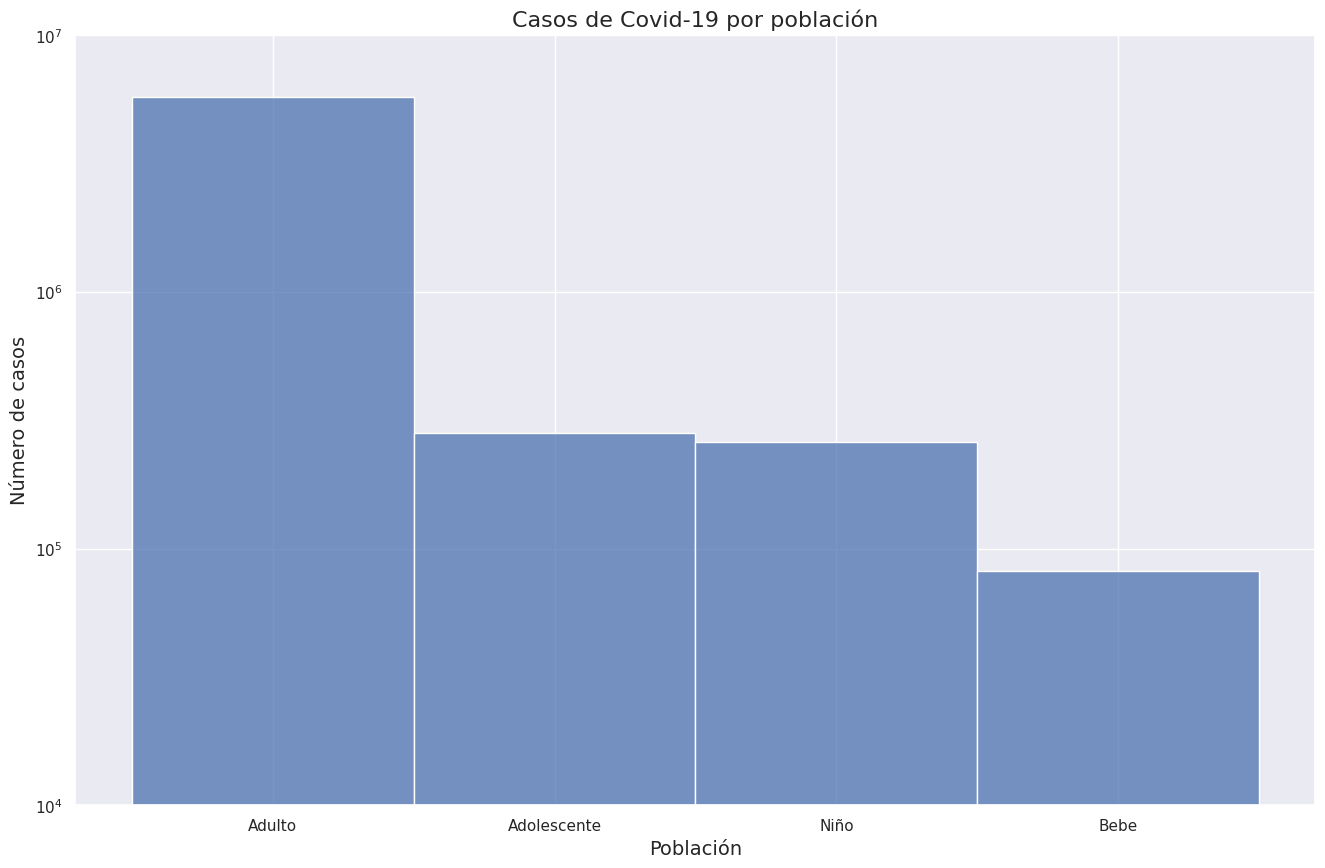

In [43]:
## We make a plot of covid cases by population
sns.set_theme()
plt.figure(figsize=(16, 10))
sns.histplot(ds['Población'],
             kde=False);

# We adjust the plot
plt.yscale('log')
plt.ylim(1e4,1e7)
plt.xlabel("Población", fontsize=14)
plt.ylabel("Número de casos", fontsize=14)
plt.title("Casos de Covid-19 por población", fontsize=16)

Positive cases by population segments created: adults, adolescents, children, and babies.






Text(0.5, 1.0, 'Fallecidos y Sobrevivientes por Población ')

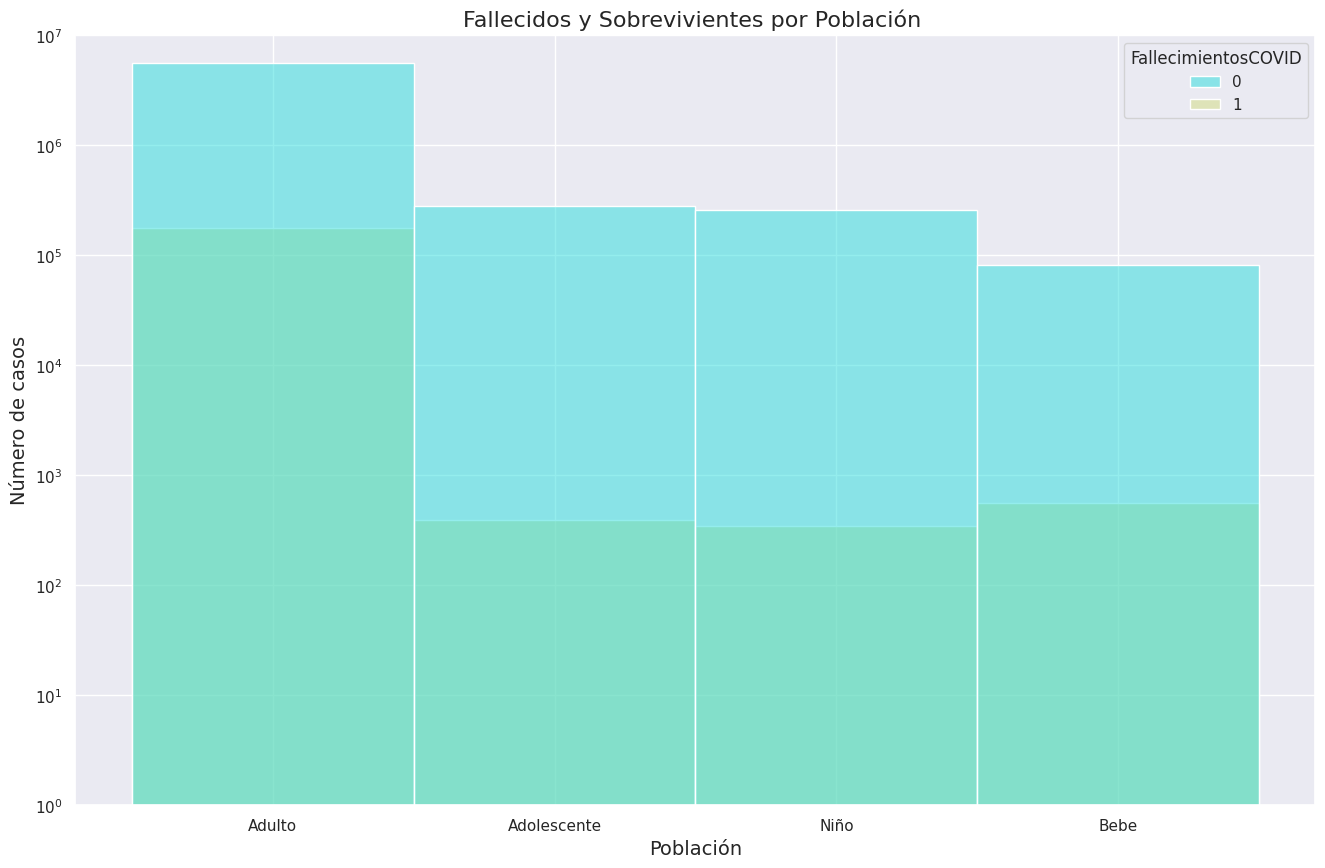

In [37]:
plt.figure(figsize=(16, 10))
sns.histplot(data=ds, x='Población',  hue='FallecimientosCOVID', palette='rainbow');

# We adjust the plot
plt.yscale('log')
plt.ylim(1e0,1e7)
plt.xlabel("Población", fontsize=14)
plt.ylabel("Número de casos", fontsize=14)
plt.title("Fallecidos y Sobrevivientes por Población ", fontsize=16)

Positive cases and number of deaths. 0 survive, 1 death.








Text(18.3293197820216, 0.5, 'Número de Casos')

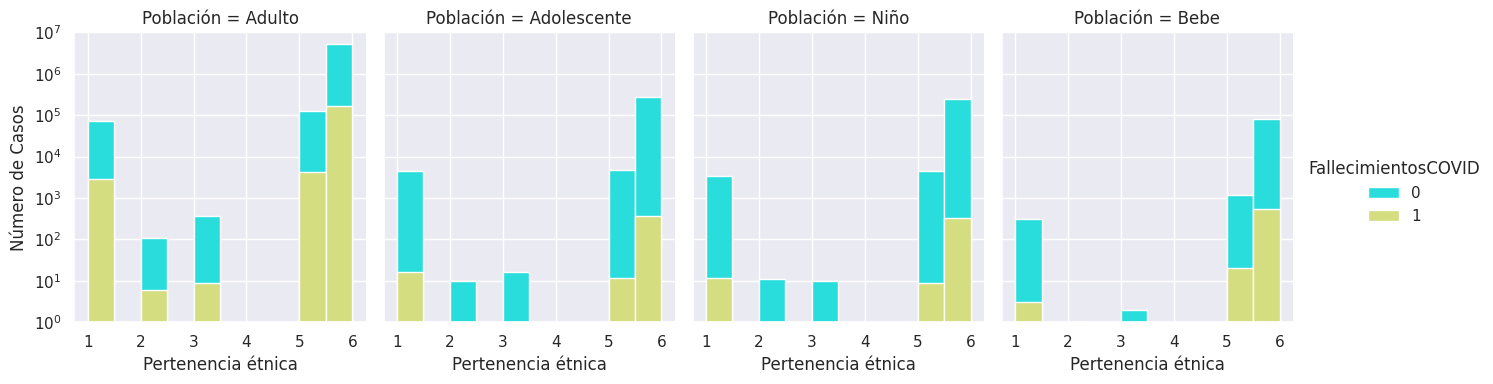

In [38]:
g = sns.FacetGrid(ds, col="Población",hue='FallecimientosCOVID',palette='rainbow',height=4, aspect=0.8)
g = g.map(plt.hist, "Pertenencia étnica").add_legend()
plt.yscale('log')
plt.ylim(1e0,1e7)

g.axes[0,0].set_ylabel('Número de Casos')

Positive cases and deaths, segmented by ethnicity. 0 survives, 1 dies. On the x-axis, we can see the numbering of the ethnicities:

1.   Indigenous
2.   ROM
3.   Raizal
4.   Palenqueros
5.   Black
6.   Others



The following shows the positive cases with their respective deaths, by departments where 0 is survive and 1 is die. As we can see in the above, the majority of those who were infected survived. The majority of those who were infected did not have a distinctive ethnicity.






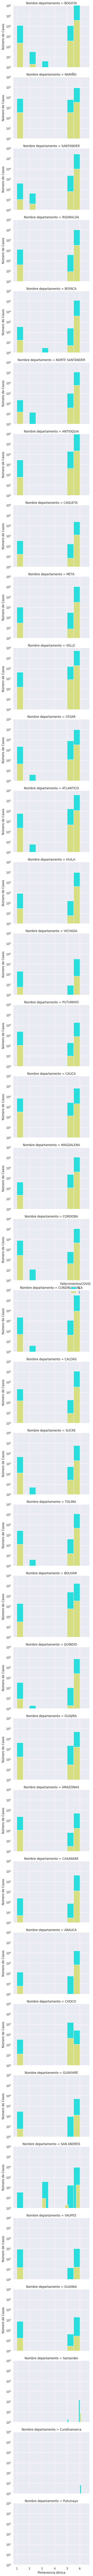

In [44]:
g = sns.FacetGrid(ds, row="Nombre departamento",hue='FallecimientosCOVID',palette='rainbow',height=4, aspect=0.8)
g = g.map(plt.hist, "Pertenencia étnica").add_legend()
plt.yscale('log')
plt.ylim(1e0,1e6)
plt.tight_layout()

for i in range(0,33):
  g.axes[i,0].set_ylabel('Número de Casos')

# **Conclusion**



As we can see, although babies and children were affected by the pandemic, the death rates remained low for the country of Colombia. One of the biggest differentials in impact were the ethnic groups. The ethnic groups that were least affected were those that remain outside of the major municipalities.

Despite the above, we can see that in general, the death rates for babies remained low, compared to the overall average of 3% before vaccination began